# LAB | Unsupervised Learning

### Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

## Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [ ]:
username = 'root'
password = ''
host = 'localhost'
port = '3306'
database = 'ml_dbs'
table_name = 'wholesale_customers_data'

connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

engine = create_engine(connection_string)

customers_df = pd.read_sql_table(table_name, con=engine)

## Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Channel: Horeca or Retail
# Region: Customers Region
# Fresh-Delicassen: Annual Sales for each food category

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
print(customers_df.isna().any().any())

False


In [7]:
customers_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


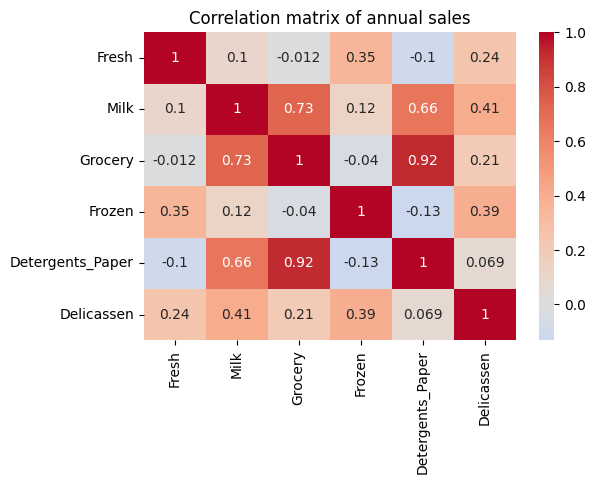

In [8]:
# Collinearity

# Correlation matrix
sales_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
corr = customers_df[sales_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation matrix of annual sales")
plt.show()

In [9]:
print(customers_df[sales_cols].describe().T)

                  count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0  


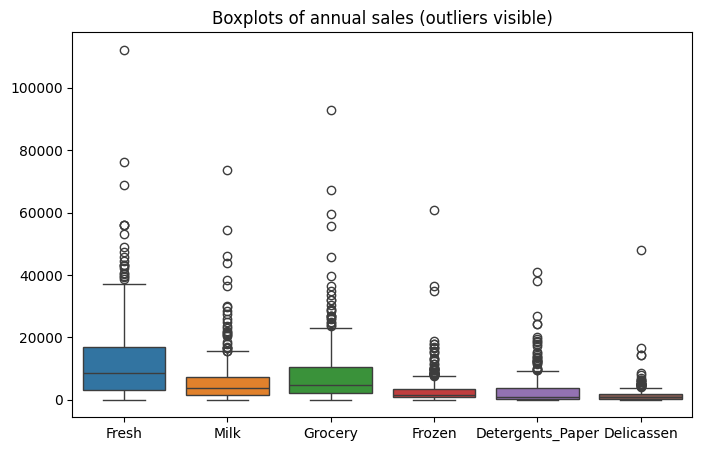

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=customers_df[sales_cols])
plt.title("Boxplots of annual sales (outliers visible)")
plt.show()

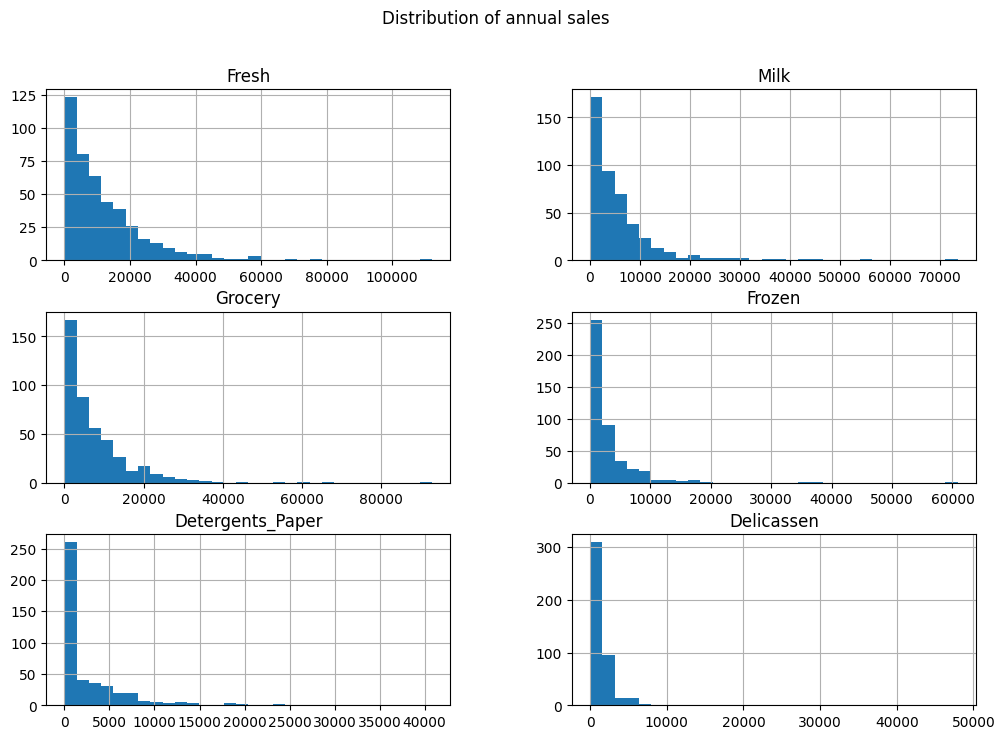

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


In [11]:
customers_df[sales_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribution of annual sales")
plt.show()

# Skewness values
print(customers_df[sales_cols].skew())

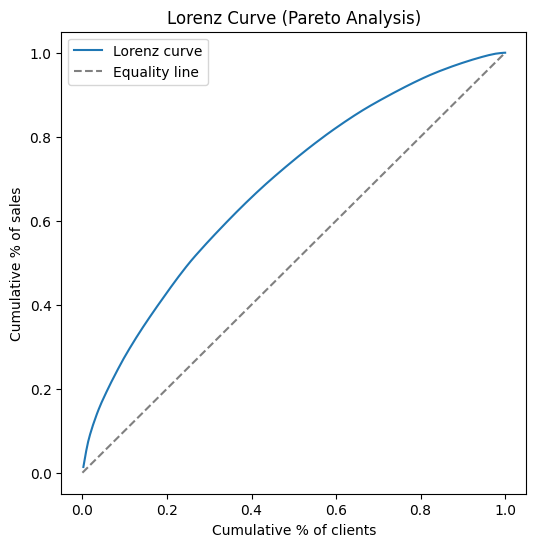

Top 57.3% of clients account for 80% of sales


In [12]:
customers_df['total_sales'] =  customers_df.iloc[:, 2:8].sum(axis=1)

df_sorted = customers_df.sort_values('total_sales', ascending=False)

df_sorted['cum_sales'] = df_sorted['total_sales'].cumsum()
df_sorted['cum_sales_perc'] = df_sorted['cum_sales'] / df_sorted['total_sales'].sum()
df_sorted['cum_clients_perc'] = np.arange(1, len(df_sorted)+1) / len(df_sorted)

plt.figure(figsize=(6,6))
plt.plot(df_sorted['cum_clients_perc'], df_sorted['cum_sales_perc'], label="Lorenz curve")
plt.plot([0,1],[0,1], linestyle="--", color="gray", label="Equality line")
plt.xlabel("Cumulative % of clients")
plt.ylabel("Cumulative % of sales")
plt.title("Lorenz Curve (Pareto Analysis)")
plt.legend()
plt.show()

pareto_cutoff = df_sorted[df_sorted['cum_sales_perc'] >= 0.8].iloc[0]
clients_needed = df_sorted.index.get_loc(pareto_cutoff.name) + 1
perc_clients = clients_needed / len(df_sorted) * 100

print(f"Top {perc_clients:.1f}% of clients account for 80% of sales")

## Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [5]:
# Your code here

In [6]:
# Your comment here

## Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [13]:
from sklearn.preprocessing import StandardScaler

# Select only the feature columns (exclude total_sales or IDs if present)
X = customers_df[sales_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
customers_scale = scaler.fit_transform(X)

# Optional: put back into a DataFrame for readability
import pandas as pd
customers_scale = pd.DataFrame(customers_scale, columns=sales_cols)

# Quick check
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [14]:
from sklearn.cluster import KMeans

# Initialize KMeans (start with 2 clusters as a baseline)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit on scaled data
kmeans.fit(customers_scale)

# Labels assigned to each row
labels = kmeans.labels_

# Add to original dataframe
customers_df['labels'] = labels

Count the values in `labels`.

In [15]:
print(customers_df['labels'].value_counts())

# Quick look at how clusters differ
cluster_means = customers_df.groupby('labels')[sales_cols].mean()
print(cluster_means)

labels
0    373
1     67
Name: count, dtype: int64
               Fresh         Milk      Grocery       Frozen  Detergents_Paper  \
labels                                                                          
0        8290.289544  5652.005362  8172.721180  2034.777480       3170.058981   
1       32654.522388  6599.388060  6718.462687  8845.940299       1275.000000   

         Delicassen  
labels               
0       1171.914209  
1       3489.835821  


## Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [16]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN (default min_samples=5)
dbscan = DBSCAN(eps=0.5)

# Fit on scaled data
dbscan.fit(customers_scale)

# Labels assigned (-1 means noise)
labels_dbscan = dbscan.labels_

# Add to dataframe
customers_df['labels_DBSCAN'] = labels_dbscan

Count the values in `labels_DBSCAN`.

In [17]:
print(customers_df['labels_DBSCAN'].value_counts())

# Quick cluster profile
cluster_means_dbscan = customers_df.groupby('labels_DBSCAN')[sales_cols].mean()
print(cluster_means_dbscan)

labels_DBSCAN
 0    261
-1    174
 1      5
Name: count, dtype: int64
                      Fresh          Milk       Grocery       Frozen  \
labels_DBSCAN                                                          
-1             15608.988506  10000.408046  13693.298851  4786.275862   
 0              9030.398467   3077.318008   4234.061303  1963.432950   
 1             41446.600000   1421.200000   2167.600000  1276.400000   

               Detergents_Paper   Delicassen  
labels_DBSCAN                                 
-1                  5291.373563  2510.781609  
 0                  1322.134100   881.773946  
 1                   416.200000   784.800000  


## Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

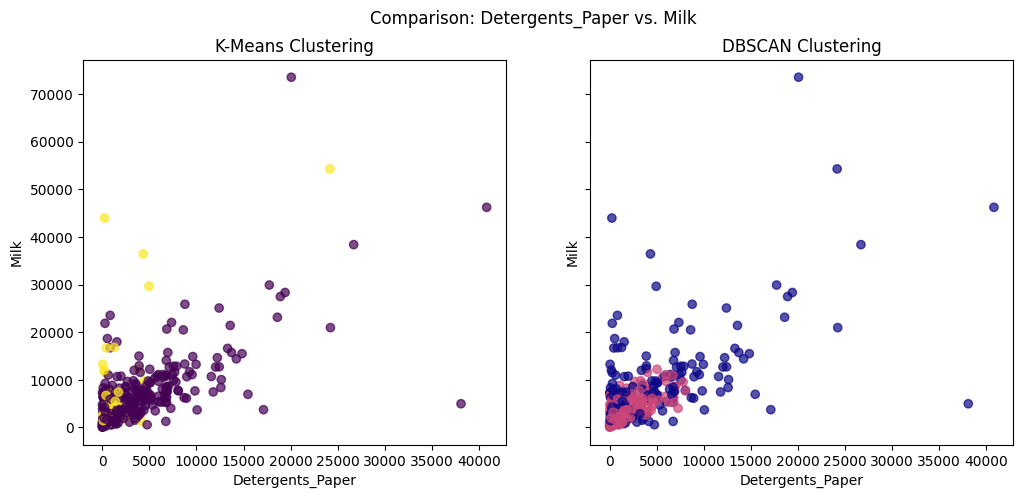

In [18]:
import matplotlib.pyplot as plt

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# K-Means labels
axes[0].scatter(
    customers_df['Detergents_Paper'],
    customers_df['Milk'],
    c=customers_df['labels'],
    cmap='viridis',
    alpha=0.7
)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Detergents_Paper")
axes[0].set_ylabel("Milk")

# DBSCAN labels
axes[1].scatter(
    customers_df['Detergents_Paper'],
    customers_df['Milk'],
    c=customers_df['labels_DBSCAN'],
    cmap='plasma',
    alpha=0.7
)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Detergents_Paper")
axes[1].set_ylabel("Milk")

plt.suptitle("Comparison: Detergents_Paper vs. Milk")
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

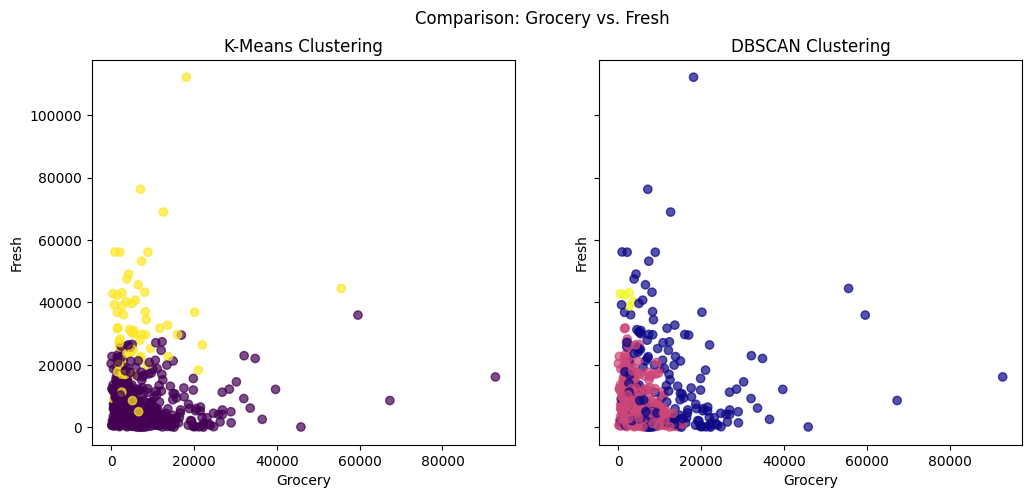

In [19]:
# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# K-Means labels
axes[0].scatter(
    customers_df['Grocery'],
    customers_df['Fresh'],
    c=customers_df['labels'],
    cmap='viridis',
    alpha=0.7
)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Grocery")
axes[0].set_ylabel("Fresh")

# DBSCAN labels
axes[1].scatter(
    customers_df['Grocery'],
    customers_df['Fresh'],
    c=customers_df['labels_DBSCAN'],
    cmap='plasma',
    alpha=0.7
)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Grocery")
axes[1].set_ylabel("Fresh")

plt.suptitle("Comparison: Grocery vs. Fresh")
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

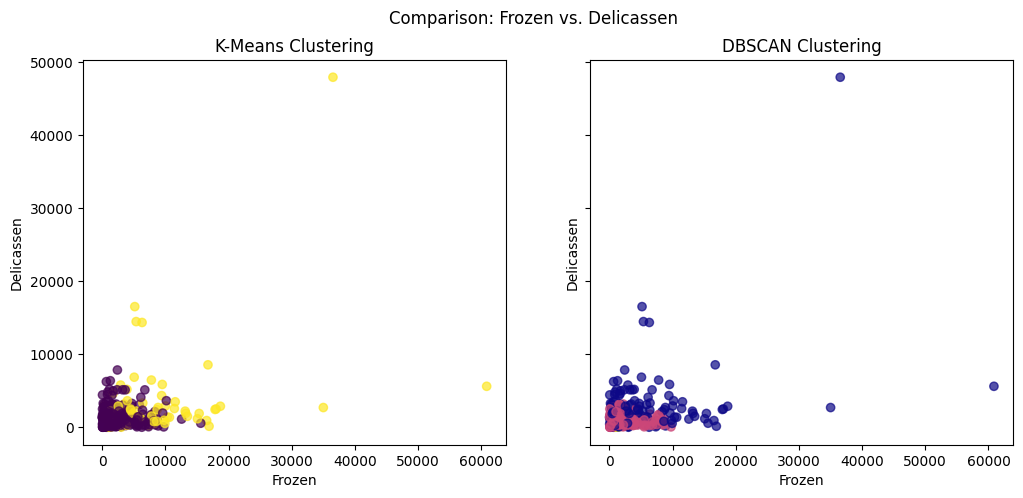

In [20]:
# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# K-Means labels
axes[0].scatter(
    customers_df['Frozen'],
    customers_df['Delicassen'],
    c=customers_df['labels'],
    cmap='viridis',
    alpha=0.7
)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Frozen")
axes[0].set_ylabel("Delicassen")

# DBSCAN labels
axes[1].scatter(
    customers_df['Frozen'],
    customers_df['Delicassen'],
    c=customers_df['labels_DBSCAN'],
    cmap='plasma',
    alpha=0.7
)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Frozen")
axes[1].set_ylabel("Delicassen")

plt.suptitle("Comparison: Frozen vs. Delicassen")
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [24]:
# K-Means clusters
kmeans_group_means = customers_df.groupby('labels').mean()
print("K-Means cluster means:")
kmeans_group_means

K-Means cluster means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_sales,labels_DBSCAN
labels,,,,,,,,,,
0,1.356568,2.514745,8290.289544,5652.005362,8172.721180,2034.777480,3170.058981,1171.914209,28491.766756,-0.321716
1,1.134328,2.701493,32654.522388,6599.388060,6718.462687,8845.940299,1275.000000,3489.835821,59583.149254,-0.731343


In [25]:
# DBSCAN clusters
dbscan_group_means = customers_df.groupby('labels_DBSCAN').mean()
print("DBSCAN cluster means:") 
dbscan_group_means

DBSCAN cluster means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_sales,labels
labels_DBSCAN,,,,,,,,,,
-1,1.522989,2.551724,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609,51891.126437,0.310345
0,1.195402,2.528736,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946,20509.118774,0.030651
1,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,47512.800000,1.000000


Which algorithm appears to perform better?

In [27]:
# K-Means performed better here:
# It gave two clear segments with business meaning.
# The clusters are balanced enough for analysis.

# DBSCAN struggled:
# Labeled most points as “noise” (-1), which isn’t useful for customer segmentation.
# The small clusters are extreme and not generalizable.
# This happened because DBSCAN is very sensitive to eps and min_samples. With 6D sales data, eps=0.5 is too strict.

## Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

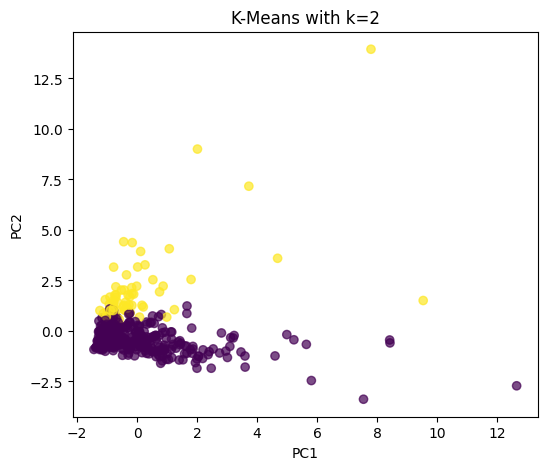

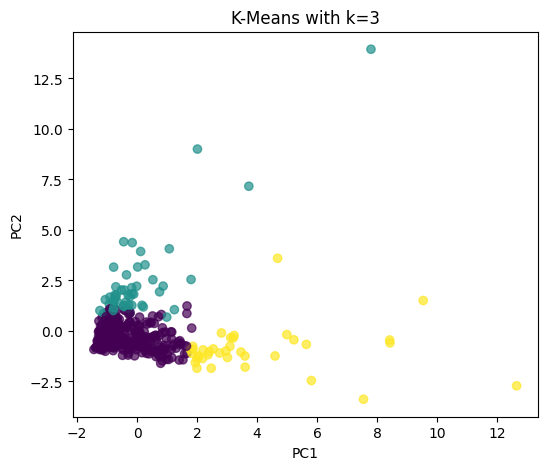

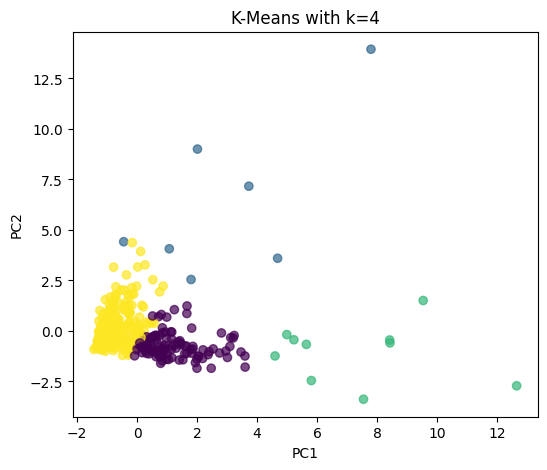

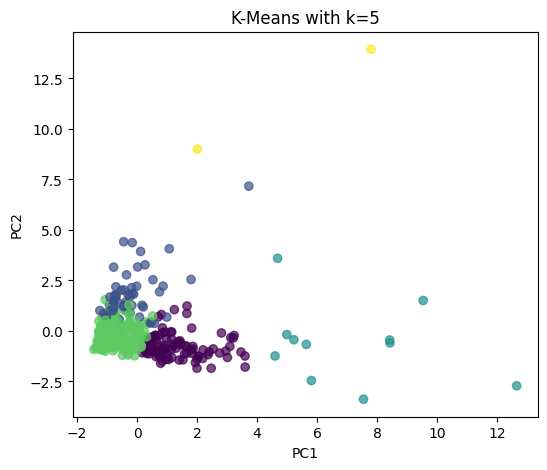

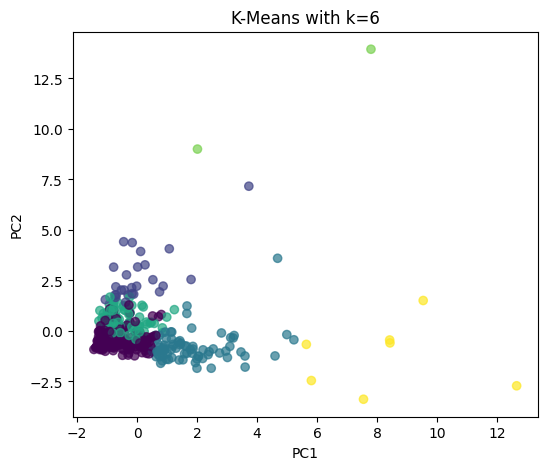

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(customers_scale)

# Try different numbers of clusters
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customers_scale)

    # Scatter plot
    plt.figure(figsize=(6, 5))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(f"K-Means with k={k}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [29]:
# k=4 seems to work best. The clusters are compact and well separated, with fewer overlaps compared to other values of k. 
# The distribution also makes sense: most points are grouped into distinct, meaningful clusters, while a smaller number of points appear as outliers.

## Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

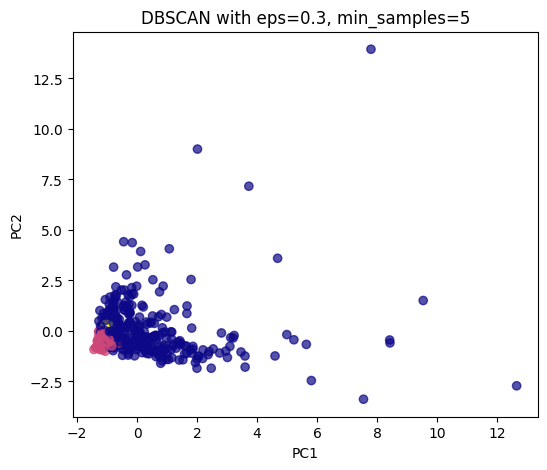

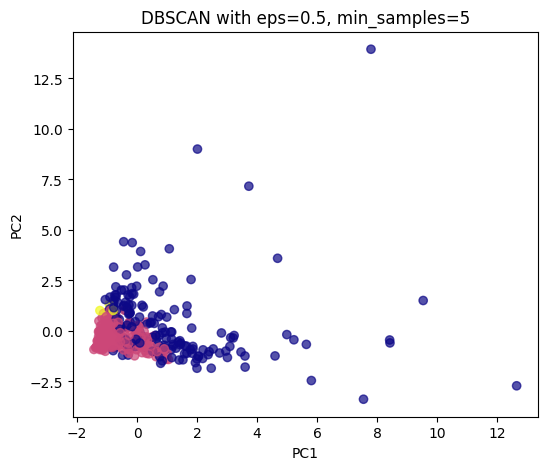

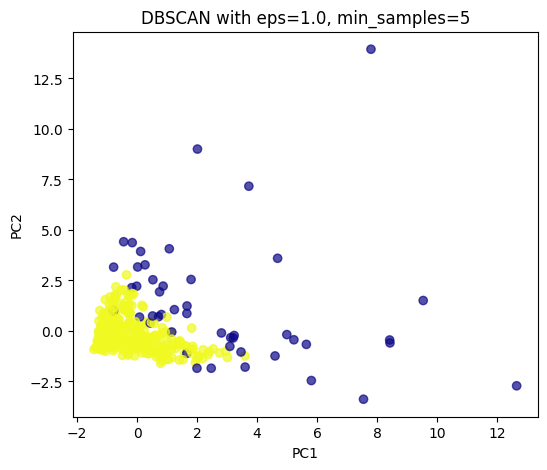

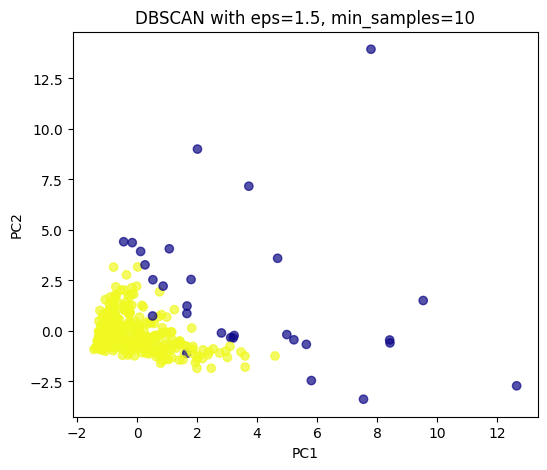

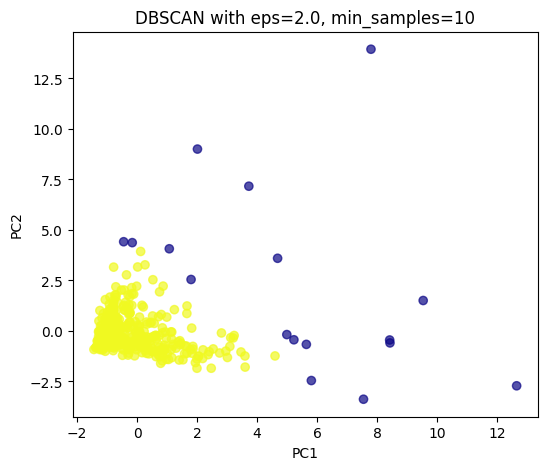

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(customers_scale)

# Try different eps and min_samples combinations
params = [
    (0.3, 5),
    (0.5, 5),   # default we used earlier
    (1.0, 5),
    (1.5, 10),
    (2.0, 10)
]

for eps, min_samples in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(customers_scale)

    plt.figure(figsize=(6, 5))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="plasma", alpha=0.7)
    plt.title(f"DBSCAN with eps={eps}, min_samples={min_samples}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [36]:
# By experimenting with different eps and min_samples values, I found that the clustering results vary widely. 
# With eps=0.5, DBSCAN produced fragmented clusters with excessive noise. 
# Increasing eps to 1.0 gave the best balance, producing two clear and interpretable clusters with minimal noise. 
# At eps=1.5, the algorithm became too loose, merging almost all customers into a single cluster. Overall, eps=1.0, min_samples=5 provided the most meaningful segmentation for this dataset.